# Locally-Weighted Linear Regression

This notebook explores locally-weighted linear regression approach for data that doesn't follow a line. 

In [53]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np

In [54]:
abalone = fetch_ucirepo(id=1) 
abalone.variables

,name,role,type,demographic,description,units,missing_values
0,Sex,Feature,Categorical,None,"M, F, and I (infant)",None,no
1,Length,Feature,Continuous,None,Longest shell measurement,mm,no
2,Diameter,Feature,Continuous,None,perpendicular to length,mm,no
3,Height,Feature,Continuous,None,with meat in shell,mm,no
4,Whole_weight,Feature,Continuous,None,whole abalone,grams,no
5,Shucked_weight,Feature,Continuous,None,weight of meat,grams,no
6,Viscera_weight,Feature,Continuous,None,gut weight (after bleeding),grams,no
7,Shell_weight,Feature,Continuous,None,after being dried,grams,no
8,Rings,Target,Integer,None,+1.5 gives the age in years,None,no


In [55]:
m = 2000  # Number of points to use

length = abalone.data.features['Whole_weight'][:m].to_numpy()
age = abalone.data.targets['Rings'][:m].to_numpy() + 1.5

The cost function is modified in a way to include the weight coefficient that is multiplied by the square of the residual:
$$
J(\theta) = \sum_{i = 1}^{m} w^{(i)} (h_\theta(x^{(i)}) - y^{(i)})^2 = \sum_{i = 1}^{m} w^{(i)} (\theta^T x^{(i)} - y^{(i)})^2
$$

The weight function itself depends on the distance from a data point to the point of interest:
$$
w^{(i)} = \exp\left(-\frac{||x^{(i)} - x||^2}{2 \tau^2}\right)
$$

$\tau$ is a hyperparameter known as the bandwidth.

Computation at each point $x$ requires us to have access to the entire dataset, which makes this algorithm non-parametric, as opposed to the standard linear regression.

Calculating the gradient w.r.t. $\theta$ gives us an equivalent of normal equations that minimizes the cost function:
$$
\theta = (X^T W X)^{-1}X^T W y
$$

The solution now depends on the diagonal matrix $W$ with $w_i$ at $i$-th diagonal entry. 

In [56]:
def weight_function(data, point, tau):
	distance = np.sum(np.power(data - point, 2))
	return np.exp(-distance/(2 * tau * tau))


def optimal_theta(point, X, y, tau):
	W = np.zeros((m, m))
	for i in range(m):
		W[i, i] = weight_function(X[i], point, tau)
	return np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y

In [57]:
def prediction(x, theta):
	return theta[0] + theta[1] * x

In [58]:
X = np.ones((m, 2))
X[:, 1] = length
y = np.array(age)

In [59]:
tau = 0.1

points = np.arange(0, 2.5, 0.5)
points = np.stack((np.ones(len(points)), points)).T

thetas = np.array([optimal_theta(point, X, y, tau) for point in points])
N_samples = len(thetas)

assert(len(thetas.shape) == 2)
assert(thetas.shape[0] == len(points))
assert(thetas.shape[1] == 2)

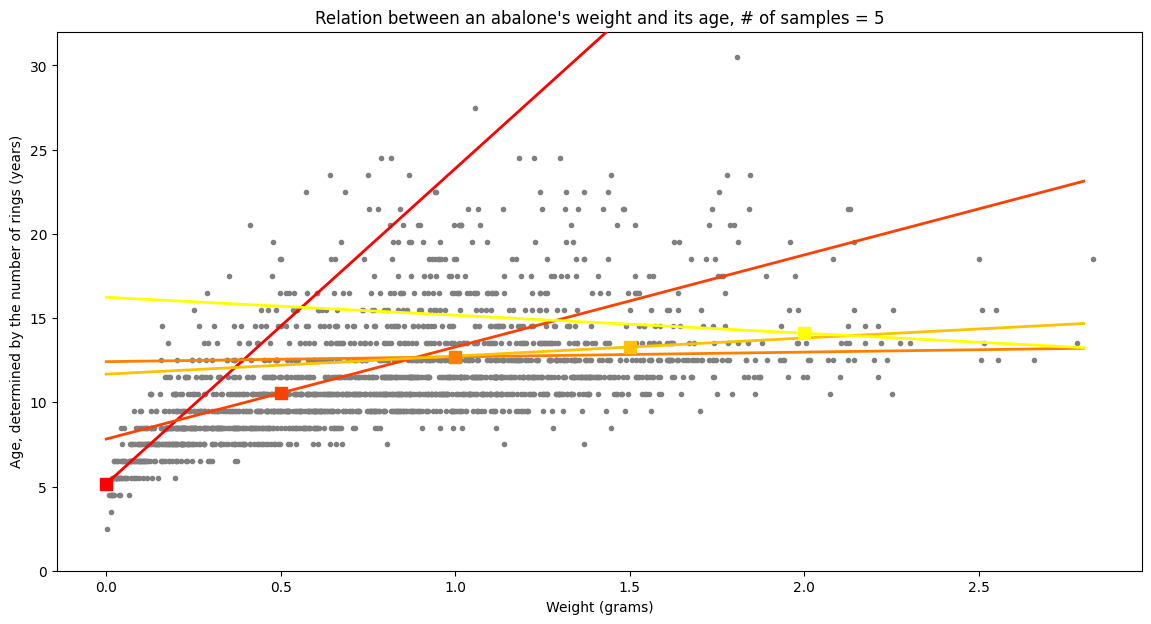

In [60]:
plt.scatter(length, age, color='gray', marker='.')
plt.xlabel("Weight (grams)")
plt.ylabel("Age, determined by the number of rings (years)")
plt.title(f"Relation between an abalone's weight and its age, # of samples = {N_samples}")

cmap = plt.get_cmap('autumn')
colors = [cmap(i) for i in np.linspace(0, 1, N_samples)]

for i in range(N_samples):
	x_vals = np.arange(0, np.max(length), 0.1)
	y_vals = prediction(x_vals, thetas[i])
	plt.plot(x_vals, y_vals, color=colors[i], linewidth=2, zorder=3)
	point = points[i, 1]
	plt.plot(point, prediction(point, thetas[i]), color=colors[i], marker='s', markersize=8, zorder=5)

plt.ylim(0, 32)
plt.rcParams["figure.figsize"] = (14,7)
plt.show()

In [61]:
tau = 0.1

points = np.arange(0, 2.7, 0.05)
points = np.stack((np.ones(len(points)), points)).T

thetas = np.array([optimal_theta(point, X, y, tau) for point in points])
N_samples = len(thetas)

assert(len(thetas.shape) == 2)
assert(thetas.shape[0] == len(points))
assert(thetas.shape[1] == 2)

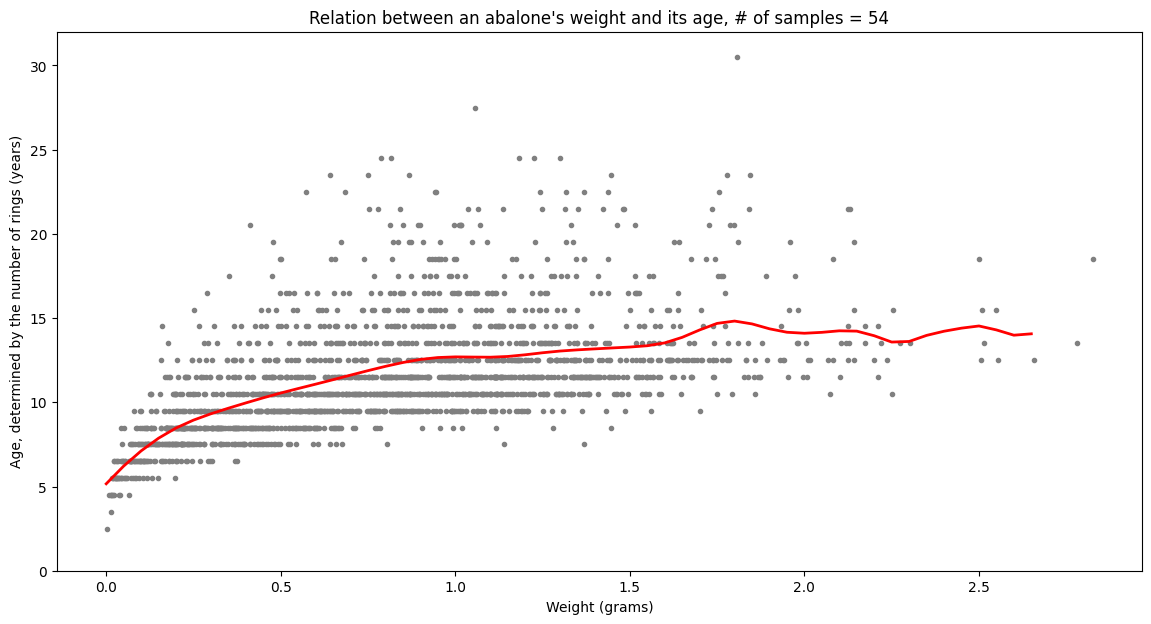

In [62]:
plt.scatter(length, age, color='gray', marker='.')
plt.xlabel("Weight (grams)")
plt.ylabel("Age, determined by the number of rings (years)")
plt.title(f"Relation between an abalone's weight and its age, # of samples = {N_samples}")

predictions = [prediction(points[i, 1], thetas[i]) for i in range(N_samples)]

plt.plot(points[:, 1], predictions, color='red', linewidth=2)

plt.ylim(0, 32)
plt.rcParams["figure.figsize"] = (14,7)
plt.show()